<center> <h2>The University of British Columbia</h2> </center>
<center> <h2>Earth and Ocean Sciences 354</h2> </center>
<center> <h3>Geophysical Time Series Analysis</h3> </center>
<center> <h3>Problem Set # 9</h3> </center>

*Due: November 16, 2020*

1. Download the file `lab9 data.mat` to your working directory. In this file you will find two time series: `s` and `a`. `s` represents a sweep and a represents the convolution of this sweep source with a reflectivity series (contains 8 spikes of varying amplitude) to produce a seismogram. This seismogram has been subsequently corrupted by additive noise. The sampling interval ${\Delta}t$ is also contained in the file.  

a) Compute the autocorrelation of the sweep by inverse Fourier transform of its power spectrum. Remember that the sweep should be padded with zeros to 2× the length. What do you notice about the autocorrelation? Comment. Which time series (`s` or its autocorrelation) would you judge to be more compact? Provide a correctly annotated plot of the  autocorrelation as well as your comments.
$$s_k \otimes s_k \leftrightarrow S_nS_n^*$$  

In [20]:
import csv
import numpy as np

sData = []
aData = []

with open('lab9_data.csv', newline='') as File:
    reader = csv.reader(File)
    next(reader)
    for row in reader:
        sData = np.append(sData, [float(row[0])])
        aData = np.append(aData, [float(row[1])])



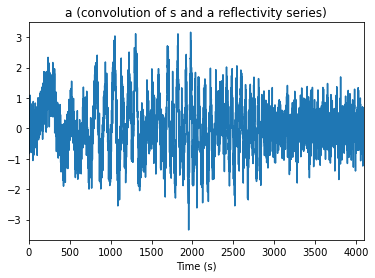

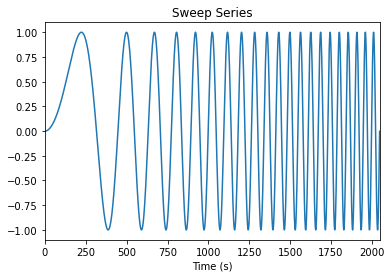

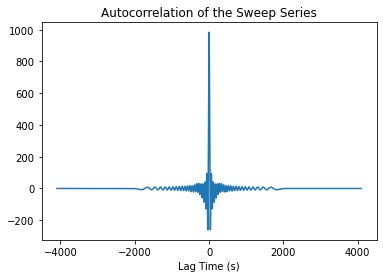

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io import loadmat
#import scipy.signal as sp


#mdata = loadmat('lab9_data.mat')

#s = mdata['s'][0]
#dt = mdata['dt'][0][0]
#a = mdata['a'][0]

s = []
a = []
dt = 1

with open('lab9_data.csv', newline='') as File:
    reader = csv.reader(File)
    next(reader)
    for row in reader:
        s = np.append(s, [float(row[0])])
        a = np.append(a, [float(row[1])])
            
N = len(s)
t = np.linspace(0, N*2*dt, N*2)
lagTime = np.linspace(-N*dt, N*dt, N*2)

# pad s and a to twice their length
sPad = np.pad(s, (0, N))
aPad = np.pad(a, (0, N))

# plots of original data
plt.plot(t, aPad)
plt.title("a (convolution of s and a reflectivity series)")
plt.xlabel("Time (s)")
plt.xlim([0, t[N]])
plt.show()

plt.plot(t, sPad)
plt.title("Sweep Series")
plt.xlabel("Time (s)")
plt.xlim([0, t[int(N/2)]])
plt.show()

### QUESTION 1 A
sTransform = np.fft.fft(sPad)
sAutocorrelationTransform = sTransform*np.conj(sTransform)
sAutocorrelation = np.fft.ifft(sAutocorrelationTransform)
plotsAutocorrelation = (np.concatenate([sAutocorrelation[N:2*N], sAutocorrelation[0:N]]))
plt.plot(lagTime, np.real(np.roll(plotsAutocorrelation, -1)))
plt.title("Autocorrelation of the Sweep Series")
plt.xlabel("Lag Time (s)")
plt.show()

b) Now use the source s as a matched filter on the seismogram a by cross-correlating the two functions. Again perform this in the frequency domain, by multiplying the complex conjugate of the Fourier transform of s with the Fourier transform of `a` (remembering again that both series should be zero-padded first to twice the non-zero length). What is the relation between this time series and the original reflectivity? Estimate the timing and location of major spikes in the reflectivity train. Provide correctly annotated plots of both the raw seismogram and
the matched filter result. Include your comments and indicate your initial estimates of the reflectivity spikes.  

In [ ]:
### QUESTION 1 B

aTransform = np.fft.fft(aPad)
asCrossCorrelationTransform = aTransform*np.conj(sTransform)
asCrossCorrelation = np.fft.ifft(asCrossCorrelationTransform)

plotasCrossCorrelation = np.real(np.concatenate([asCrossCorrelation[N:2*N], asCrossCorrelation[0:N]]))
plt.plot(lagTime, np.roll(plotasCrossCorrelation, -1), alpha=0.3)

plt.scatter(lagTime[4115], (plotasCrossCorrelation[4115]), label='Sven')
plt.scatter(lagTime[4222], (plotasCrossCorrelation[4222]), label='Sharon')
plt.scatter(lagTime[4535], (plotasCrossCorrelation[4535]), label='Christal')
plt.scatter(lagTime[4889], (plotasCrossCorrelation[4889]), label='Tibia')
plt.scatter(lagTime[4925], (plotasCrossCorrelation[4925]), label='Carl')
plt.scatter(lagTime[5130], (plotasCrossCorrelation[5130]), label='Patricia')
plt.scatter(lagTime[5897], (plotasCrossCorrelation[5897]), label='Jason')
plt.scatter(lagTime[6090], (plotasCrossCorrelation[6090]), label='Gotzog the Devourer')

plt.title("Cross-Correlation of s with a")
plt.xlabel("Lag Time (s)")
plt.xlim([-2, 4])
plt.legend()
plt.show()

c) Finally, set up the problem as a water level deconvolution; that is generate the inverse Fourier transform of the following frequency domain function:
$$\frac{A_nS_n^*}{S_nS_n^* + \delta}$$
where ${\delta}$ is a water level parameter that you can vary to achieve a compromise between stability and resolution. Compute the deconvolved estimated reflectivity for a range of ${\delta}$ and choose the value which you feel best accomplishes the deconvolution. Does your estimate of the timing and location of the spikes change from those of the matched filtering approach? Comment on the differences between the matched filter and water-level deconvolution results. Provide correctly
annotated plots for your results demonstrating a range of of ${\delta}$. Indicate the location of the reflectivity spikes on the result you feel is the best representative deconvolution. What is the result (in words and plots) for the two end member ${\delta}$ values (i.e. ${\delta} \rightarrow 0$, and $\delta >> S_nS_n^*$)?

In [ ]:
### QUESTION 1 C

for delta in [0, 1E6]:
    waterLevelTransform = (asCrossCorrelationTransform)/(sAutocorrelationTransform + delta)
    waterLevel = np.fft.ifft(waterLevelTransform)

    plotWaterLevel = (np.concatenate([waterLevel[N:2*N], waterLevel[0:N]]))
    plt.plot(lagTime, np.real(np.roll(plotWaterLevel, -1)))
    plt.title("Water Level Devoncolution with delta = " + str(delta))
    plt.xlabel("Lag Time (s)")
    plt.show()

fig, plots = plt.subplots(3)


i = 0
for delta in [25, 125, 1000]:
    waterLevelTransform = (asCrossCorrelationTransform)/(sAutocorrelationTransform + delta)
    waterLevel = np.fft.ifft(waterLevelTransform)
    plotWaterLevel = np.real(np.concatenate([waterLevel[N:2*N], waterLevel[0:N]]))
    plots[i].plot(lagTime, np.roll(plotWaterLevel, -1), alpha = 0.3)

    plots[i].scatter(lagTime[4117], plotWaterLevel[4117])
    plots[i].scatter(lagTime[4222], plotWaterLevel[4222])
    plots[i].scatter(lagTime[4547], plotWaterLevel[4547])
    plots[i].scatter(lagTime[4889], plotWaterLevel[4889])
    plots[i].scatter(lagTime[4947], plotWaterLevel[4947])
    plots[i].scatter(lagTime[5138], plotWaterLevel[5138])
    plots[i].scatter(lagTime[5886], plotWaterLevel[5886])
    plots[i].scatter(lagTime[6086], plotWaterLevel[6086])

    plots[i].set_xlim([-0.5, 2.25])
    plots[i].set_title("delta = " + str(delta))
    i += 1
plt.xlabel("Lag Time (s)")
plt.tight_layout()
plt.show()